**Задача**

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

**Наименование файлов с данными**

course_project_train.csv - обучающий датасет<br>
course_project_test.csv - тестовый датасет

**Целевая переменная**

Credit Default - факт невыполнения кредитных обязательств

**Метрика качества**

F1-score (sklearn.metrics.f1_score)

**Требования к решению**

*Целевая метрика*
* F1 > 0.5
* Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

*Решение должно содержать*
1. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}\_solution.ipynb, пример SShirkin\_solution.ipynb
2. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}\_predictions.csv, пример SShirkin\_predictions.csv

*Рекомендации для файла с кодом (ipynb)*
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения, которые были в данном курсе.

**Сроки сдачи**

Cдать проект нужно в течение 5 дней после окончания последнего вебинара.
Оценки работ, сданных до дедлайна, будут представлены в виде рейтинга, ранжированного по заданной метрике качества.
Проекты, сданные после дедлайна или сданные повторно, не попадают в рейтинг, но можно будет узнать результат.

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Score** - кредитный рейтинг: бальная оценка клиента
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [41]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import probplot

from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

In [2]:
TRAIN_DATASET_PATH = 'course_project_train.csv'
TEST_DATASET_PATH = 'course_project_test.csv'

TARGET_NAME = 'Credit Default'

In [3]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [4]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [5]:
df_train.shape

(7500, 17)

In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,5943.0,1.366392e+06,8.453392e+05,164597.0,844341.0,1168386.0,1640137.00,1.014934e+07
Tax Liens,7500.0,3.013333e-02,2.716035e-01,0.0,0.0,0.0,0.00,7.000000e+00
Number of Open Accounts,7500.0,1.113093e+01,4.908924e+00,2.0,8.0,10.0,14.00,4.300000e+01
Years of Credit History,7500.0,1.831747e+01,7.041946e+00,4.0,13.5,17.0,21.80,5.770000e+01
Maximum Open Credit,7500.0,9.451537e+05,1.602622e+07,0.0,279229.5,478159.0,793501.50,1.304726e+09
Number of Credit Problems,7500.0,1.700000e-01,4.985978e-01,0.0,0.0,0.0,0.00,7.000000e+00
Months since last delinquent,3419.0,3.469260e+01,2.168881e+01,0.0,16.0,32.0,50.00,1.180000e+02
Bankruptcies,7486.0,1.171520e-01,3.471917e-01,0.0,0.0,0.0,0.00,4.000000e+00
Current Loan Amount,7500.0,1.187318e+07,3.192612e+07,11242.0,180169.0,309573.0,519882.00,1.000000e+08
Current Credit Balance,7500.0,2.898332e+05,3.178714e+05,0.0,114256.5,209323.0,360406.25,6.506797e+06


## Credit Default

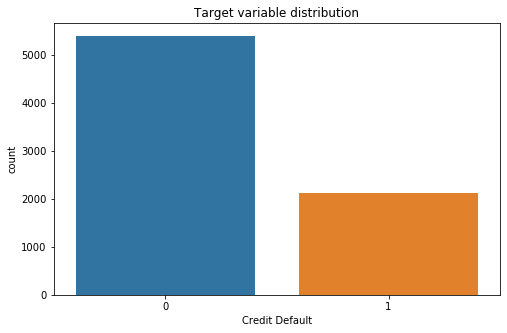

In [31]:
#df_train_result = df_train['Credit Default']
#df_train.drop(['Credit Default'], inplace=True, axis=1)
plt.figure(figsize=(8,5))

sns.countplot(x=TARGET_NAME,data=df_train)
plt.title('Target variable distribution')

plt.show()

## Home Ownership
домовладение

In [8]:
df_train['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

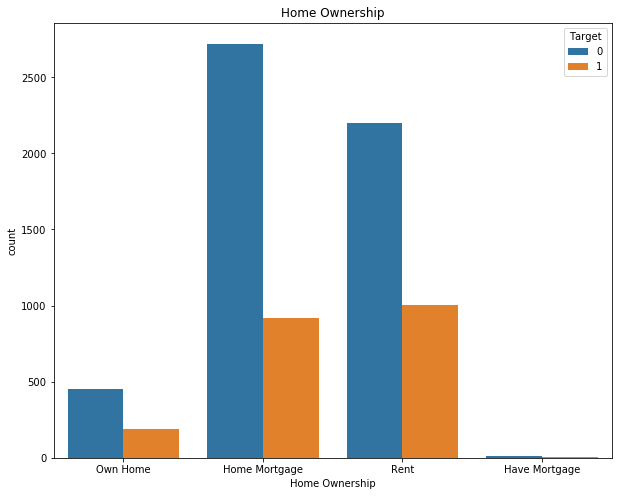

In [13]:
plt.figure(figsize=(10,8))

sns.countplot(x="Home Ownership", hue=TARGET_NAME, data=df_train)
plt.title('Home Ownership')
plt.legend(title='Target', loc='upper right')

plt.show()

In [32]:
dummies = pd.get_dummies(df_train['Home Ownership']).rename(columns=lambda x: 'Home Ownership ' + str(x))
df_train = pd.concat([df_train, dummies], axis=1)
df_train.drop(['Home Ownership'], inplace=True, axis=1)

In [33]:
dummies = pd.get_dummies(df_test['Home Ownership']).rename(columns=lambda x: 'Home Ownership ' + str(x))
df_test = pd.concat([df_test, dummies], axis=1)
df_test.drop(['Home Ownership'], inplace=True, axis=1)

## Annual Income
годовой доход

In [35]:
df_train.loc[(df_train['Annual Income'] > df_train['Annual Income'].quantile(.90)), :].shape

(595, 20)

In [36]:
df_train.loc[(df_train['Annual Income'].isnull()), ['Annual Income']] = df_train['Annual Income'].mean()

In [37]:
df_test.loc[(df_test['Annual Income'].isnull()), ['Annual Income']] = df_test['Annual Income'].mean()

In [39]:
shapiro(df_train['Annual Income'])

(0.7502885460853577, 0.0)

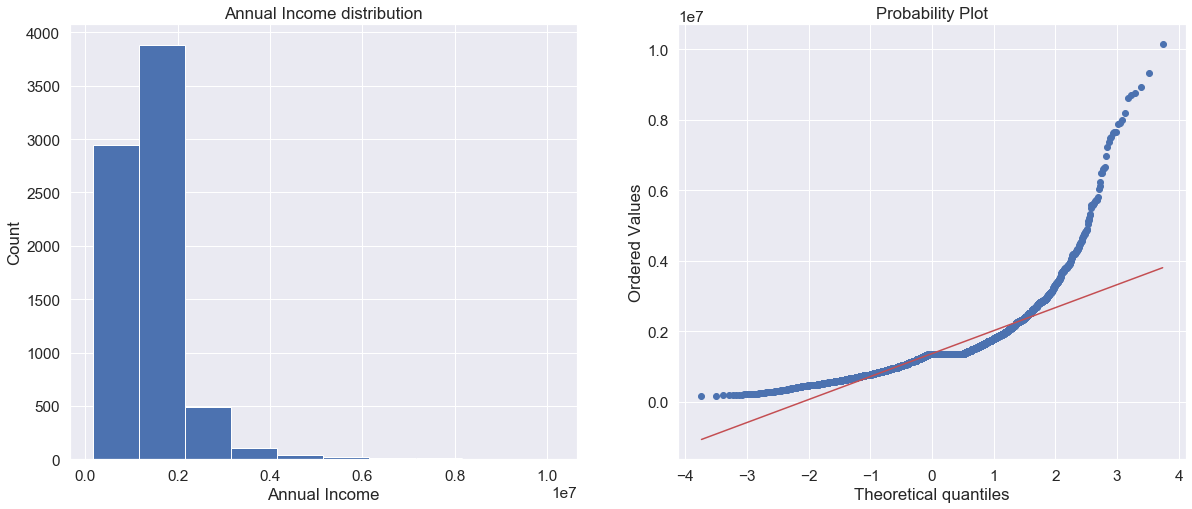

In [61]:
def hist_qq(target_name):
    plt.figure(figsize=(20,8))

    ax1 = plt.subplot(121)
    ax1.set_xlabel(target_name)
    ax1.set_ylabel('Count')
    ax1.set_title(f'{target_name} distribution')
    df_train[target_name].hist()
    plt.subplot(122)
    probplot(df_train[target_name],dist='norm',plot=plt)

    plt.show()
    
hist_qq('Annual Income')

In [46]:
Annual_Income_with_target_s = df_train[['Annual Income', TARGET_NAME]].sample(1000)
Annual_Income_target_0 = df_train.loc[df_train[TARGET_NAME] == 0, ['Annual Income']]
Annual_Income_target_1 = df_train.loc[df_train[TARGET_NAME] == 1, ['Annual Income']]

In [45]:
mannwhitneyu(Annual_Income_target_0, Annual_Income_target_1)

MannwhitneyuResult(statistic=5077512.5, pvalue=1.3347021239648878e-13)

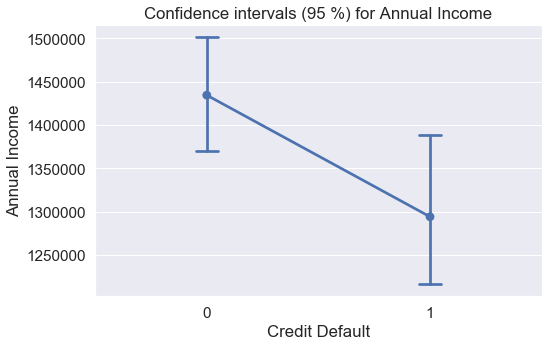

In [47]:
plt.figure(figsize=(8,5))

sns.pointplot(x=TARGET_NAME, y='Annual Income', data=Annual_Income_with_target_s, capsize=.1)
plt.title('Confidence intervals (95 %) for Annual Income')

plt.show()

In [ ]:
### !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
###  Всеравно это ключевая переменная

## Years in current job
количество лет на текущем месте работы

In [48]:
df_train['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [49]:
def correct(value):
    if isinstance(value, int):
        return value
    if value == "< 1 year":
        return 0
    elif value == "1 year":
        return 1
    elif value == "2 years":
        return 2
    elif value == "3 years":
        return 3
    elif value == "4 years":
        return 4
    elif value == "5 years":
        return 5
    elif value == "6 years":
        return 6
    elif value == "7 years":
        return 7
    elif value == "8 years":
        return 8
    elif value == "9 years":
        return 9
    elif value == "10+ years":
        return 10
    else:
        return 0

df_train['Years in current job'] = df_train['Years in current job'].apply(correct)

In [50]:
df_test['Years in current job'] = df_test['Years in current job'].apply(correct)

In [51]:
##df_train.head(5)

In [ ]:
##df_test.head(5)

## Tax Liens
налоговые обременения

In [52]:
df_train['Tax Liens'].describe()

count    7500.000000
mean        0.030133
std         0.271604
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: Tax Liens, dtype: float64

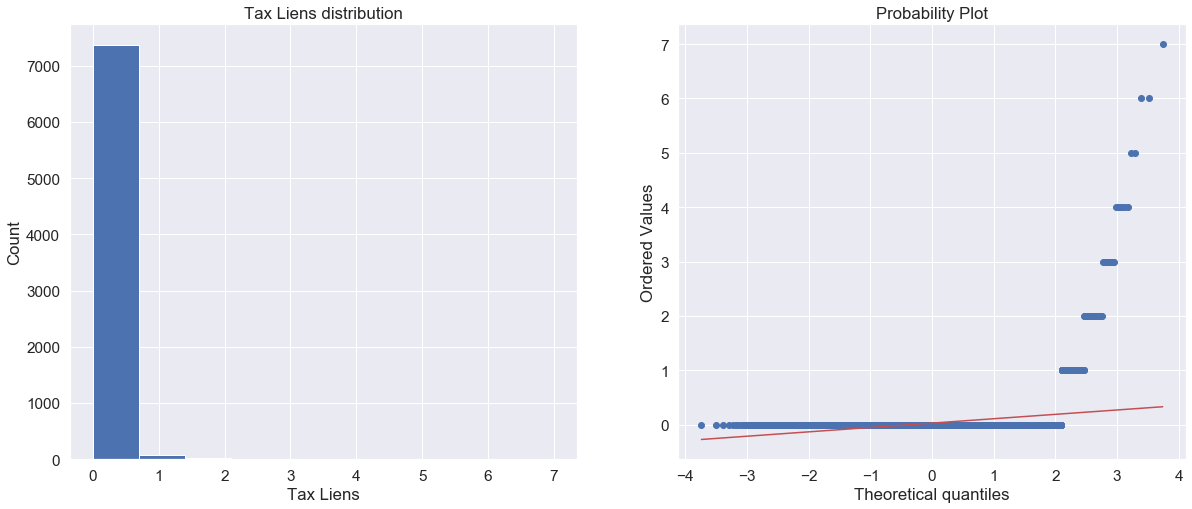

In [62]:
hist_qq('Tax Liens')

In [ ]:
#ничиго не делаем

## Number of Open Accounts
количество открытых счетов

In [ ]:
##df_train['Number of Open Accounts'].describe()

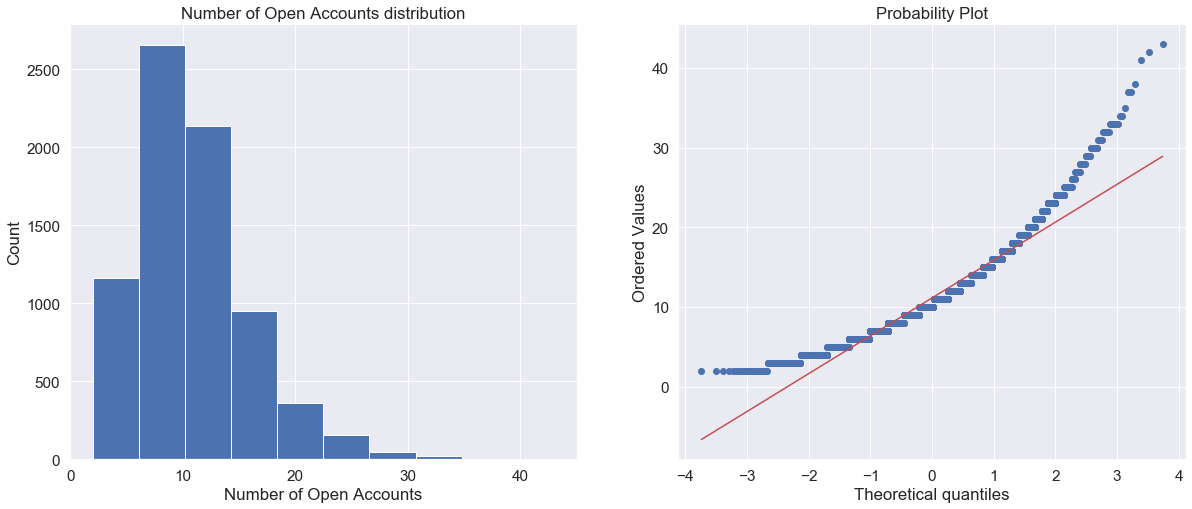

In [63]:
hist_qq('Number of Open Accounts')

In [56]:
NoOA_with_target_s = df_train[['Number of Open Accounts', TARGET_NAME]].sample(1000)
NoOA_target_0 = df_train.loc[df_train[TARGET_NAME] == 0, ['Number of Open Accounts']]
NoOA_target_1 = df_train.loc[df_train[TARGET_NAME] == 1, ['Number of Open Accounts']]

In [57]:
mannwhitneyu(NoOA_target_0, NoOA_target_1)

MannwhitneyuResult(statistic=5466480.0, pvalue=0.003761646078803518)

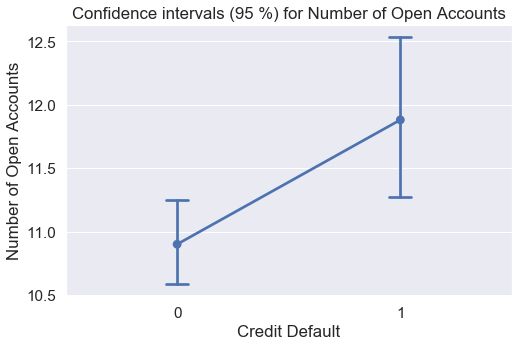

In [58]:
plt.figure(figsize=(8,5))

sns.pointplot(x=TARGET_NAME, y='Number of Open Accounts', data=NoOA_with_target_s, capsize=.1)
plt.title('Confidence intervals (95 %) for Number of Open Accounts')

plt.show()

## Years of Credit History
количество лет кредитной истории

In [ ]:
##df_train['Years of Credit History'].describe()

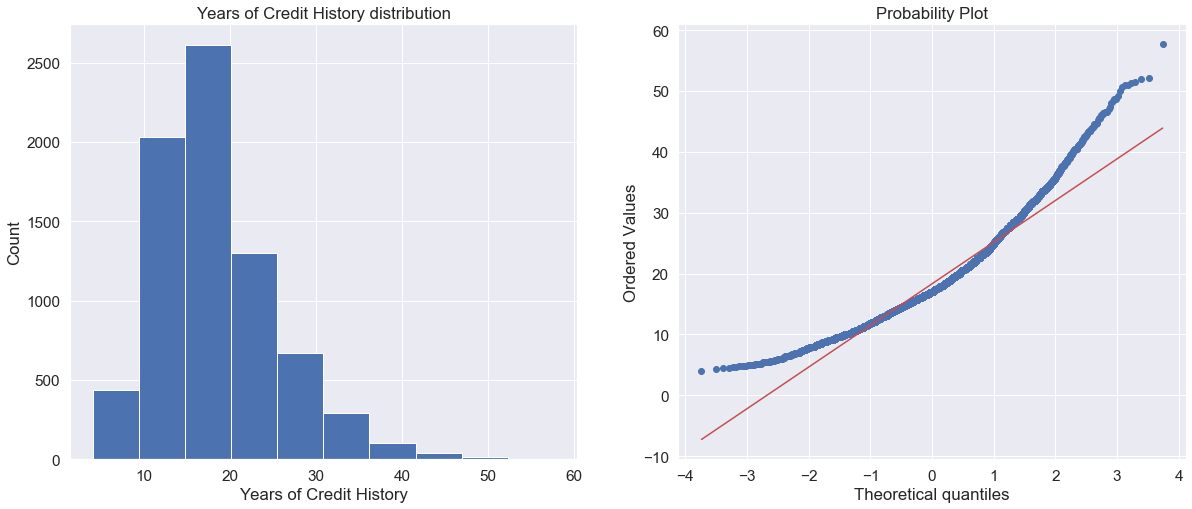

In [64]:
hist_qq('Years of Credit History')

In [65]:
YoCH_with_target_s = df_train[['Years of Credit History', TARGET_NAME]].sample(1000)
YoCH_target_0 = df_train.loc[df_train[TARGET_NAME] == 0, ['Years of Credit History']]
YoCH_target_1 = df_train.loc[df_train[TARGET_NAME] == 1, ['Years of Credit History']]

In [66]:
mannwhitneyu(YoCH_target_0, YoCH_target_1)

MannwhitneyuResult(statistic=5461129.5, pvalue=0.003171215731103466)

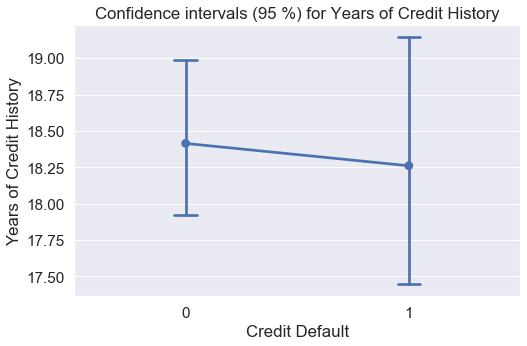

In [67]:
plt.figure(figsize=(8,5))

sns.pointplot(x=TARGET_NAME, y='Years of Credit History', data=YoCH_with_target_s, capsize=.1)
plt.title('Confidence intervals (95 %) for Years of Credit History')

plt.show()

In [68]:
df_train.drop(['Years of Credit History'], inplace=True, axis=1)
df_test.drop(['Years of Credit History'], inplace=True, axis=1)

## Maximum Open Credit 
наибольший открытый кредит

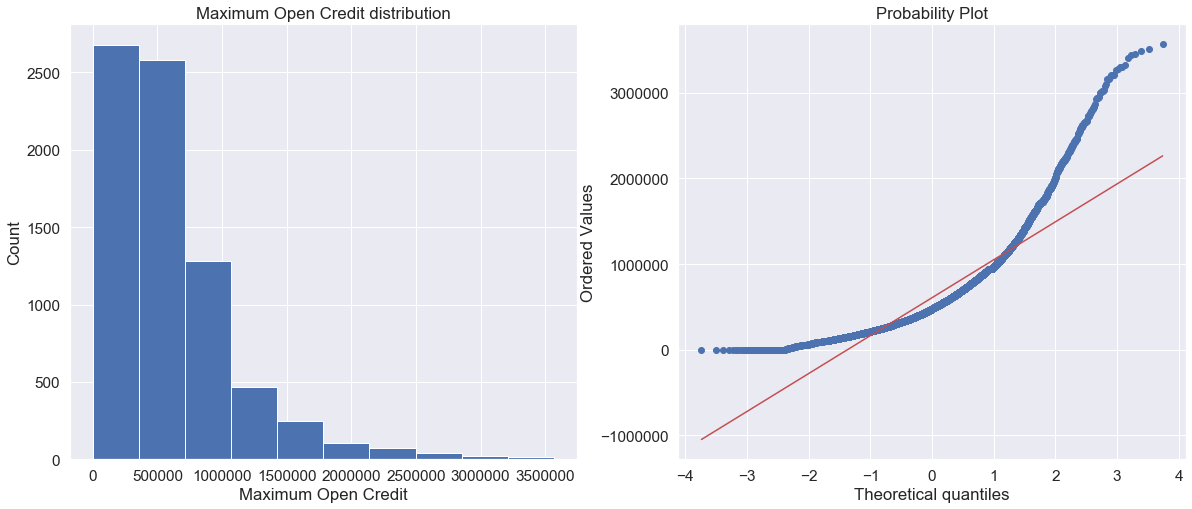

In [78]:
hist_qq('Maximum Open Credit')

In [70]:
df_train['Maximum Open Credit'].describe()

count    7.500000e+03
mean     9.451537e+05
std      1.602622e+07
min      0.000000e+00
25%      2.792295e+05
50%      4.781590e+05
75%      7.935015e+05
max      1.304726e+09
Name: Maximum Open Credit, dtype: float64

In [73]:
df_train.loc[ df_train['Maximum Open Credit'] > df_train['Maximum Open Credit'].quantile(.99), :].shape

(75, 19)

In [77]:
mean = df_train.loc[ :, 'Maximum Open Credit'].mean()
df_train.loc[ df_train['Maximum Open Credit'] > df_train['Maximum Open Credit'].quantile(.99), ['Maximum Open Credit']]= mean

In [79]:
mean = df_test.loc[ :, 'Maximum Open Credit'].mean()
df_test.loc[ df_test['Maximum Open Credit'] > df_test['Maximum Open Credit'].quantile(.99), ['Maximum Open Credit']]= mean

## Number of Credit Problems
количество проблем с кредитом

In [80]:
df_train['Number of Credit Problems'].describe()

count    7500.000000
mean        0.170000
std         0.498598
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: Number of Credit Problems, dtype: float64

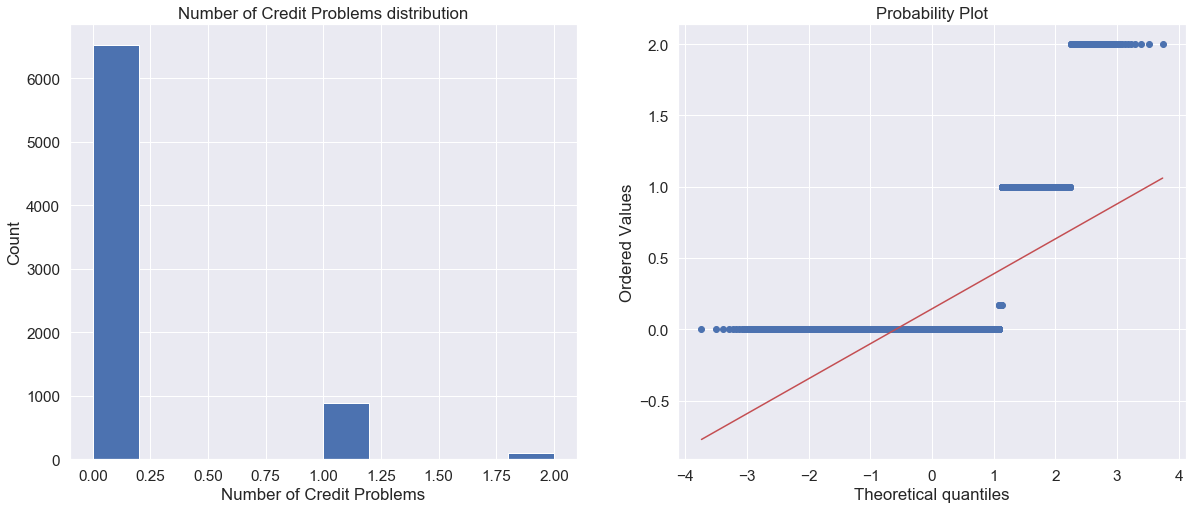

In [85]:
hist_qq('Number of Credit Problems')

In [83]:
df_train.loc[ df_train['Number of Credit Problems'] > df_train['Number of Credit Problems'].quantile(.99), :].shape

(56, 19)

In [84]:
mean = df_train.loc[ :, 'Number of Credit Problems'].mean()
df_train.loc[ df_train['Number of Credit Problems'] > df_train['Number of Credit Problems'].quantile(.99), ['Number of Credit Problems']]= mean

In [87]:
mean = df_test.loc[ :, 'Number of Credit Problems'].mean()
df_test.loc[ df_test['Number of Credit Problems'] > df_test['Number of Credit Problems'].quantile(.99), ['Number of Credit Problems']]= mean

## Months since last delinquent
 количество месяцев с последней просрочки платежа

In [86]:
##train_data_Msld_mean = df_train.loc[df_train['Months since last delinquent'].notnull(), 'Months since last delinquent'].mean(axis=0)
df_train.loc[df_train['Months since last delinquent'].isnull(), 'Months since last delinquent'] = 0

##test_data_Msld_mean = df_test.loc[df_test['Months since last delinquent'].notnull(), 'Months since last delinquent'].mean(axis=0)
df_test.loc[df_test['Months since last delinquent'].isnull(), 'Months since last delinquent'] = 0

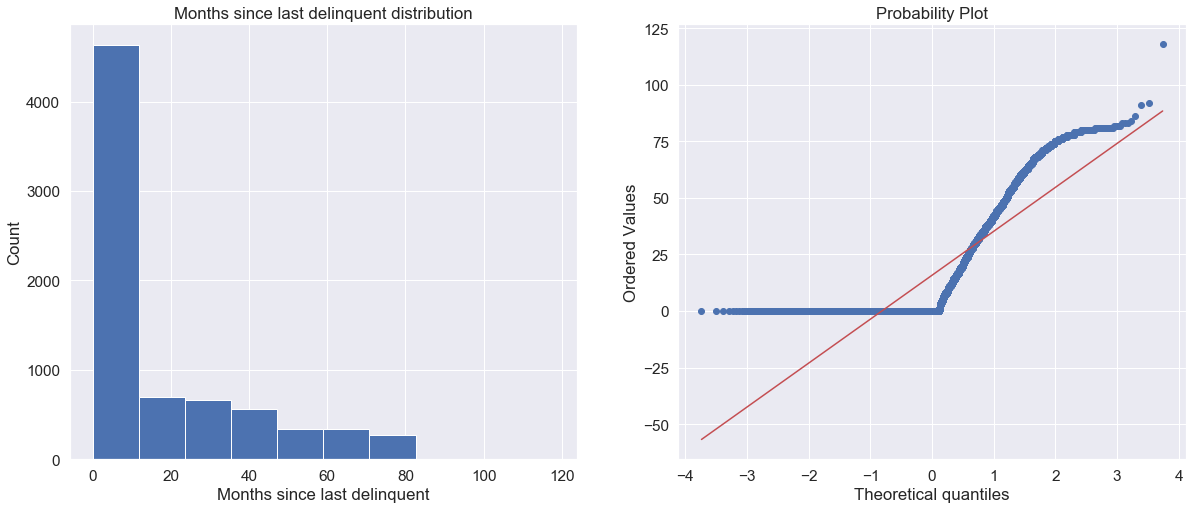

In [88]:
hist_qq('Months since last delinquent')

In [91]:
df_train.loc[ df_train['Months since last delinquent'] > df_train['Months since last delinquent'].quantile(.99), :].shape

(59, 19)

In [93]:
mean = df_train.loc[ :, 'Months since last delinquent'].mean()
df_train.loc[ df_train['Months since last delinquent'] > df_train['Months since last delinquent'].quantile(.99), ['Months since last delinquent']]= mean

In [94]:
mean = df_test.loc[ :, 'Months since last delinquent'].mean()
df_test.loc[ df_test['Months since last delinquent'] > df_test['Months since last delinquent'].quantile(.99), ['Months since last delinquent']]= mean

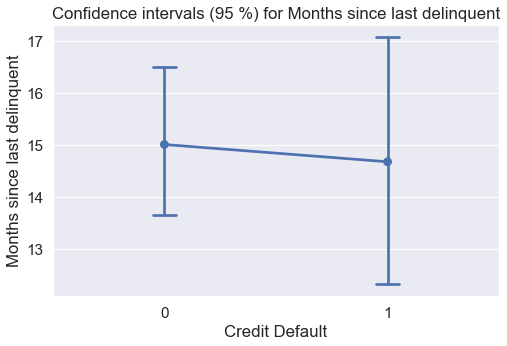

In [95]:
Msld_with_target_s = df_train[['Months since last delinquent', TARGET_NAME]].sample(1000)
plt.figure(figsize=(8,5))

sns.pointplot(x=TARGET_NAME, y='Months since last delinquent', data=Msld_with_target_s, capsize=.1)
plt.title('Confidence intervals (95 %) for Months since last delinquent')

plt.show()

In [96]:
df_train.drop(['Months since last delinquent'], inplace=True, axis=1)
df_test.drop(['Months since last delinquent'], inplace=True, axis=1)

## Bankruptcies
банкротства

In [ ]:
df_train['Bankruptcies'].value_counts()

In [ ]:
df_train.loc[df_train['Bankruptcies'].isnull(), 'Bankruptcies'] = 0
df_test.loc[df_test['Bankruptcies'].isnull(), 'Bankruptcies'] = 0

## Purpose
цель кредита

In [ ]:
df_train['Purpose'].value_counts()

In [ ]:
df_test['Purpose'].value_counts()

In [ ]:
dummies = pd.get_dummies(df_train['Purpose']).rename(columns=lambda x: 'Purpose ' + str(x))
df_train = pd.concat([df_train, dummies], axis=1)
df_train.drop(['Purpose'], inplace=True, axis=1)
df_train.drop(['Purpose renewable energy'], inplace=True, axis=1)

dummies = pd.get_dummies(df_test['Purpose']).rename(columns=lambda x: 'Purpose ' + str(x))
df_test = pd.concat([df_test, dummies], axis=1)
df_test.drop(['Purpose'], inplace=True, axis=1)

In [ ]:
#df_train.head()

In [ ]:
#df_test.head()

## Term 
срок кредита

In [ ]:
df_train['Term'].value_counts()

In [ ]:
df_test['Term'].value_counts()

In [ ]:
df_train['Term'] = (df_train['Term'] == 'Long Term').astype(int)
df_test['Term'] = (df_test['Term'] == 'Long Term').astype(int)
df_train['Term'].value_counts()

## Current Loan Amount
текущая сумма кредита

In [ ]:
df_train['Current Loan Amount'].describe()

In [ ]:
df_test['Current Loan Amount'].describe()

In [ ]:
df_train.loc[ df_train['Current Loan Amount'] > df_train['Current Loan Amount'].quantile(.99), :].shape

## Current Credit Balance
текущий кредитный баланс

In [ ]:
df_train['Current Credit Balance'].describe()

## Monthly Debt 
ежемесячный долг

In [ ]:
df_train['Monthly Debt'].describe()

## Credit Score
кредитный рейтинг: бальная оценка клиента

In [ ]:
df_train.loc[ df_train['Credit Score'] > df_train['Credit Score'].quantile(.99), ['Credit Score']].shape

In [ ]:
train_data_CS_mean = df_train.loc[df_train['Credit Score'].notnull(), 'Credit Score'].mean(axis=0)
df_train.loc[df_train['Credit Score'].isnull(), 'Credit Score'] = train_data_CS_mean

test_data_CS_mean = df_test.loc[df_test['Credit Score'].notnull(), 'Credit Score'].mean(axis=0)
df_test.loc[df_test['Credit Score'].isnull(), 'Credit Score'] = test_data_CS_mean

In [ ]:
df_train.info()

In [ ]:
df_test.info()

In [ ]:

BASE_FEATURE_NAMES = df_train.columns.drop(TARGET_NAME).tolist()

In [ ]:
corr_with_target = df_train[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

In [34]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df_train[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

NameError: name 'BASE_FEATURE_NAMES' is not defined

<Figure size 1800x1440 with 0 Axes>

In [ ]:
#df_train_result = df_train['Credit Default']
#df_train.drop(['Credit Default'], inplace=True, axis=1)